## AD325 Project 1 - Capital Gains Tracker

Fall 2024

Alan M H Beem

runtime: about 2 minutes

### Description:

This main .ipynb file contains behavior to demonstrate deque data structure representation of stock purchases and testing of buy and sell methods. All elements of the Cartesian product of buy and sell methods are compared in terms of profit / revenue, relative elapsed time, and a ratio of profit / revenue to relative elapsed time.

TradingBot: An object for the purpose of tracking balance, profit, and elapsed times, over transactions. Contains a method string_to_trading_bot() that interprets a multiline string, as provided on Canvas, as a series of buy, sell, and display, commands. Also contains settings for buy and sell methods to facilitate combinations of these settings, and accumulates elapsed time buying and selling.

Were these TradingBot instances selling shares in order to cover a fixed or variable operating cost, more-optimal strategies would allow the generation of a required amount of profit (or increase in current balance) from the sale of a lesser number of shares, so mixtures of these strategies between and per bot might produce interesting results (such as wealth accumulation from a randomly generated starting state).

##### Future directions:

Add a similar representation of loans, and repayment strategies (given the strings generated below, sometimes the TradingBot s end up with or incur a negative balance).

Add a loop wherein instances of a subclass of TradingBot (Bots) buy and sell to each other, and a general market (a numerical model or for example one or more TradingBot s using default buy method, and e.g. implementing a hash table to assemble available shares from shuffled keys).

Add to the loop selection of Monte Carlo generated sets of rules with operands in attributes and history of Bots; use a digraph to represent information and decisions whereby Bots conditionally copy one another; shuffle the order Bots make decisions at each iteration, leave it constant, sort by integral of balance or f(profit/revenue).

Add a function to interpret strings as events that determine market sentiment (number of buys to generate, number of sells to generate, in the general market per iteration), and randomly select or use a transformer to generate strings of abstracted historical and corporate events.

In [1]:
# setup
from trading_bot import TradingBot
from capital_gains_helper_methods import *
import matplotlib.pyplot as plt
import copy

## Methods for buying and selling

"When the sale price is greater than the ledger entry average, make as much money as possible.", "When the sale price is less than the ledger entry average, lose as little money as possible."; both statements are effected by filling sale quantities using the lowest priced stock purchases available.

Each of these methods uses deque behaviors to implement a schema, the goal of the use of these methods is increasing profit (or decreasing loss) per dollar of revenue.

Where applicable, these methods repeat until all purchased shares are in the deque, or a sale is filled.

### Accumulated profit for combinations of buy and sell methods:

color is mapped to relative elapsed time for combination of buy and sell methods (this is described numerically for 50 generated strings below)


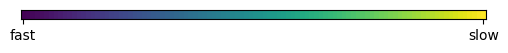

(In legend, at right) TradingBot objects sorted by total elapsed time buying and selling.


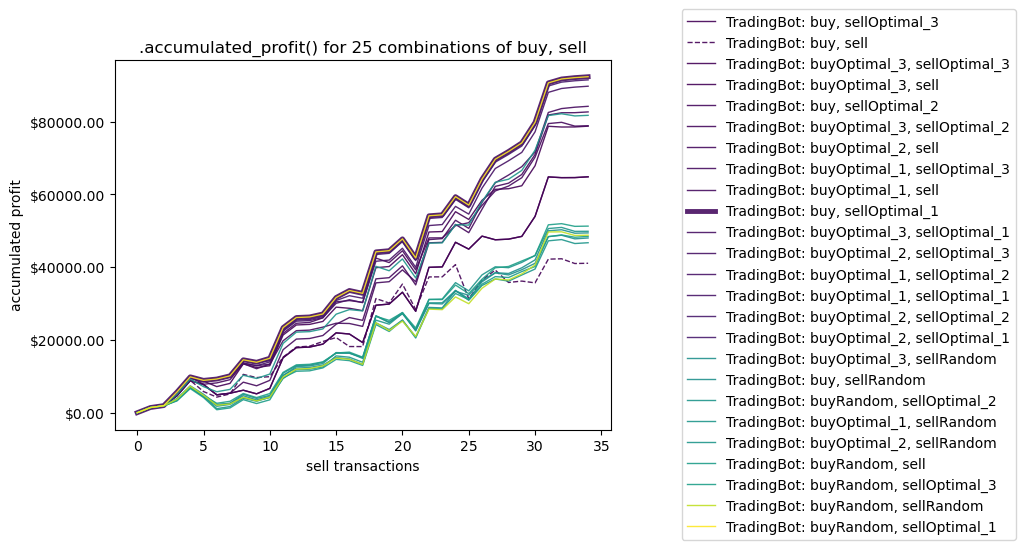

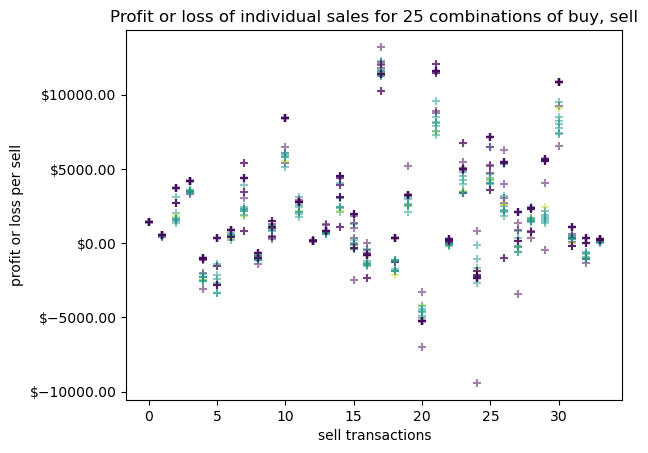

In [2]:
# cmap methods from reading: https://matplotlib.org/stable/users/explain/colors/colormaps.html
# displays legend for colormap (fast, slow)
cmap = plt.get_cmap('viridis')
print("color is mapped to relative elapsed time for combination of buy and sell methods (this is described numerically for 50 generated strings below)")
fig, ax = plt.subplots()
fig.set_size_inches(6, 2)
ax.imshow(([0.01 * c_i for c_i in range(int(1 / 0.01))], [0.01 * c_i for c_i in range(int(1 / 0.01))]), cmap=cmap)
# ax.set_axis_off()
ax.set_yticks([])
ax.set_xticks([0, 99])
ax.set_xticklabels(['fast', 'slow'])
plt.show()
#
print('(In legend, at right) TradingBot objects sorted by total elapsed time buying and selling.')
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter('${x:1.2f}')
plt.title('.accumulated_profit() for 25 combinations of buy, sell')
#
stock_symbol_list = ['AAPL', 'MSFT', 'TSLA', 'NVDA']
generated_string, expected_totals = generate_buy_sell_lines_string(stock_symbol_list, 100)
bots_gen = []
for buy_i in range(1, 6):
    for sell_i in range(1, 6):
        bots_gen.append(TradingBot(100000, sell_setting=sell_i, buy_setting=buy_i))
        bots_gen[-1].string_to_trading_bot(generated_string)
#
sorted_bots = copy.deepcopy(bots_gen)
sorted_bots.sort(key=lambda p: p.total_times()[0] + p.total_times()[1])
for each_gen_bot in sorted_bots:
    current_color = cmap((each_gen_bot.total_times()[0] + each_gen_bot.total_times()[1]) / max([(c_bot.total_times()[0] + c_bot.total_times()[1]) for c_bot in bots_gen]))
    if each_gen_bot.buy_setting == 1 and each_gen_bot.sell_setting == 1:
        current_linestyle = 'dashed'
    else:
        current_linestyle = 'solid'
    if each_gen_bot.buy_setting == 1 and each_gen_bot.sell_setting == 3:
        current_linewidth = 3.5
    else:
        current_linewidth = 1.0
    ax.plot(each_gen_bot.accumulated_profit(), label=str(each_gen_bot), alpha=0.9, color=current_color, linestyle=current_linestyle, linewidth=current_linewidth)
plt.ylabel('accumulated profit')
plt.xlabel('sell transactions')
# fig.legend(loc='outside lower center')
ax.legend(bbox_to_anchor=(1, 1),            # from matplotlib documentation
          bbox_transform=fig.transFigure)
plt.show()
# sellOptimal_1 cannot be improved by addition of a buy strategy
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter('${x:1.2f}')
plt.title('Profit or loss of individual sales for 25 combinations of buy, sell')
for each_gen_bot in bots_gen:
    plt.scatter(range(len(each_gen_bot.profit_per_sell)), each_gen_bot.profit_per_sell, label=str(each_gen_bot), alpha=0.5, marker='+', color=cmap((each_gen_bot.total_times()[0] + each_gen_bot.total_times()[1]) / max([(c_bot.total_times()[0] + c_bot.total_times()[1]) for c_bot in bots_gen])))
plt.ylabel('profit or loss per sell')
plt.xlabel('sell transactions')
plt.show()

## Comparing combinations of strategies for 50 generated strings
a runtime: 1m 37.9s

In [3]:
# comparison setup, for buy x sell (Cartesian product), 50 strings of 100 transactions of [1, 100] shares.
buy_column = ['buy', 'buyRandom', 'buyOptimal_1', 'buyOptimal_2', 'buyOptimal_3']
sell_row = ['sell', 'sellRandom', 'sellOptimal_1', 'sellOptimal_2', 'sellOptimal_3']
average_performance_matrix = [[0 for n in sell_row] for m in buy_column]  # an m x n matrix
average_elapsed_time_matrix = [[0 for n in sell_row] for m in buy_column]  # an m x n matrix
total_elapsed_time_matrix = [[0 for n in sell_row] for m in buy_column]  # an m x n matrix
total_buy_time_matrix = [[0 for n in sell_row] for m in buy_column]  # an m x n matrix
total_sell_time_matrix = [[0 for n in sell_row] for m in buy_column]  # an m x n matrix
num_iterations = 50
to_bot_strings_list = [generate_buy_sell_lines_string(stock_symbol_list, 100)[0] for s in range(num_iterations)]
for each_string in to_bot_strings_list:
    for i in range(5):
        for j in range(5):
            tb_combs = TradingBot(0, i + 1, j + 1)
            tb_combs.string_to_trading_bot(each_string)
            average_performance_matrix[i][j] += (tb_combs.profit() / tb_combs.revenue())
            buy_time, sell_time = tb_combs.total_times()
            average_elapsed_time_matrix[i][j] += buy_time + sell_time
            total_elapsed_time_matrix[i][j] += buy_time + sell_time
            total_buy_time_matrix[i][j] += buy_time
            total_sell_time_matrix[i][j] += sell_time
for i in range(5):
    for j in range(5):
        average_performance_matrix[i][j] /= num_iterations
        average_elapsed_time_matrix[i][j] /= num_iterations

### Profit / revenue

In [4]:
print(f"Profit divided by revenue for each combination, averaged over {num_iterations} iterations\n")
print(''.join([each_s.ljust(15).rjust(20) for each_s in ([''] + sell_row)]))
maximum = 0
for i in range(5):
    print()
    current_row = buy_column[i].ljust(15).rjust(20)
    for j in range(5):
        maximum = max(maximum, average_performance_matrix[i][j])
        current_row += f"{average_performance_matrix[i][j]:.3f}".ljust(15).rjust(20)
    print(current_row)
print()
print(f"Maximum average ratio of profit to revenue: {maximum : .3f}")

Profit divided by revenue for each combination, averaged over 50 iterations

                         sell                sellRandom          sellOptimal_1       sellOptimal_2       sellOptimal_3  

     buy                 0.059               0.051               0.296               0.253               0.167          

     buyRandom           0.051               0.051               0.296               0.258               0.059          

     buyOptimal_1        0.296               0.052               0.296               0.296               0.296          

     buyOptimal_2        0.204               0.050               0.296               0.281               0.253          

     buyOptimal_3        0.166               0.052               0.296               0.264               0.166          

Maximum average ratio of profit to revenue:  0.296


##### buyRandom decreases the performance of sellOptimal_3.

### Elapsed time to buy and sell (normalized to (buy, sell))

In [5]:
import copy
print('Elapsed time to buy, sell, normalized to (buy, sell)\n')
buy_sell = total_elapsed_time_matrix[0][0]
normalized_time_matrix = copy.deepcopy(total_elapsed_time_matrix)
for i in range(5):
    for j in range(5):
        normalized_time_matrix[i][j] /= buy_sell
print(''.join([each_s.ljust(15).rjust(20) for each_s in ([''] + sell_row)]))
for i in range(5):
    print()
    current_row = buy_column[i].ljust(15).rjust(20)
    for j in range(5):
        current_row += f"{normalized_time_matrix[i][j]:.3f}".ljust(15).rjust(20)
    print(current_row)

Elapsed time to buy, sell, normalized to (buy, sell)

                         sell                sellRandom          sellOptimal_1       sellOptimal_2       sellOptimal_3  

     buy                 1.000               95.429              10.004              5.573               2.429          

     buyRandom           64.443              156.597             147.645             69.177              65.581         

     buyOptimal_1        5.702               99.475              11.233              8.631               4.844          

     buyOptimal_2        5.632               98.264              11.958              8.617               4.982          

     buyOptimal_3        1.126               95.690              8.852               5.486               1.434          


##### The strategy tuple with the minimum normalized elapsed time that achieves the maximum profitability is: (buyOptimal_1, sell) or (buyOptimal_1, sellOptimal_3)

#### Elapsed time to sell, given different buy methods, normalized to (buy, sell)

In [6]:
print('Elapsed time selling, given different buy methods, normalized to (buy, sell)\n')
print(''.join([each_s.ljust(15).rjust(20) for each_s in ([''] + sell_row)]))
for i in range(5):
    print()
    current_row = buy_column[i].ljust(15).rjust(20)
    for j in range(5):
        current_row += f"{total_sell_time_matrix[i][j] / total_sell_time_matrix[0][0]:.4f}".ljust(15).rjust(20)
    print(current_row)

Elapsed time selling, given different buy methods, normalized to (buy, sell)

                         sell                sellRandom          sellOptimal_1       sellOptimal_2       sellOptimal_3  

     buy                 1.0000              273.8708            21.5784             14.1920             2.4938         

     buyRandom           1.3466              273.2603            248.8803            15.0078             2.3899         

     buyOptimal_1        1.1407              276.4283            20.7561             12.8144             1.8254         

     buyOptimal_2        1.0616              273.6658            22.6658             13.2007             2.1491         

     buyOptimal_3        1.0095              276.0673            21.0480             13.4217             1.8074         


##### buyRandom slows down sellOptimal_1.

### Ratio of profit / revenue to normalized elapsed time

##### This shows a ratio that would be relevant to deciding which algorithm to use for implementations that operate (at least in part) on realtime data.

In [7]:
profit_to_time_matrix = []
i = j = 0
maximum_ratio = 0
for each_row_ratio, each_row_norm_time in zip(average_performance_matrix, normalized_time_matrix):
    profit_to_time_matrix.append([])
    for ratio, norm_time in zip(each_row_ratio, each_row_norm_time):
        profit_to_time_matrix[-1].append(ratio / norm_time)
        maximum_ratio = max(maximum_ratio, ratio / norm_time)
        j += 1
    i += 1
print('Average profit / revenue over relative elapsed time, normalized to maximum\n')
print(''.join([each_s.ljust(15).rjust(20) for each_s in ([''] + sell_row)]))
for i in range(5):
    print()
    current_row = buy_column[i].ljust(15).rjust(20)
    for j in range(5):
        current_row += f"{profit_to_time_matrix[i][j] / maximum_ratio:.4f}".ljust(15).rjust(20)
    print(current_row)

Average profit / revenue over relative elapsed time, normalized to maximum

                         sell                sellRandom          sellOptimal_1       sellOptimal_2       sellOptimal_3  

     buy                 0.3993              0.0036              0.2014              0.3091              0.4691         

     buyRandom           0.0054              0.0022              0.0136              0.0254              0.0061         

     buyOptimal_1        0.3533              0.0036              0.1794              0.2334              0.4159         

     buyOptimal_2        0.2464              0.0035              0.1685              0.2217              0.3460         

     buyOptimal_3        1.0000              0.0037              0.2276              0.3278              0.7855         


##### Some less-optimal strategies are a "better deal" in terms of computing time than more-optimal strategies.

### Appendix:

### Expected behavior (StockLedger state, LinkedDeque state) over provided buy sell sequence

Directly interpreting string as StockLedger:
----  Stock Ledger  ----
AAPL: 20.0 (90 shares)   24.0 (20 shares)   
MSFT: 95.0 (14 shares)   60.0 (5 shares)   70.0 (5 shares)   
TSLA: 36.0 (50 shares)   

Total shares (additional display method of StockLedger):
Total shares:
AAPL: 110 shares
MSFT: 24 shares
TSLA: 50 shares

LinkedDeque.display():
LinkedDeque: AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AA

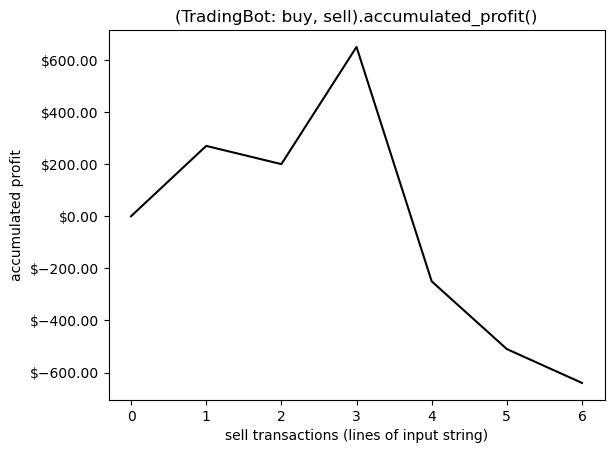

In [8]:
# Buy, sell, display string from Project 1 assignment
buy_sell_str = """Buy 20 shares of AAPL at $45.
Buy 20 shares of AAPL at $75.
Buy 20 shares of MSFT at $95.
Display the ledger
Sell 30 shares of AAPL at $65
Display the ledger
Sell 10 shares of AAPL at $65
Display the ledger
Buy 100 shares of AAPL at $20
Buy 20 shares of AAPL at $24
Buy 200 shares of TSLA at $36
Display the ledger
Sell 10 shares of AAPL at $65
Display the ledger
Sell 150 shares of TSLA at $30
Display the ledger
Buy 5 shares of MSFT at $60
Buy 5 shares of MSFT at $70
Display the ledger
Sell 4 shares of MSFT at $30
Display the ledger
Sell 2 shares of MSFT at $30
Display the ledger"""
print('Directly interpreting string as StockLedger:')
sl_test_1 = interpret_string_as_ledger(buy_sell_str)
sl_test_1.display_ledger()
print()
print('Total shares (additional display method of StockLedger):')
sl_test_1.display_total_shares()
print()
print('LinkedDeque.display():')
sl_test_1[0]._linked_deque.display()
print()
print('Interpreting string as buy, sell, display to TradingBot (has StockLedger):')
tb_test_1 = TradingBot(100000)  # default values: buy_setting: 1, sell_setting: 1
tb_test_1.string_to_trading_bot(buy_sell_str, display_bool=True)
tb_test_1.stock_ledger.display_ledger()
print()
fig, ax = plt.subplots()
plt.title(f"({tb_test_1}).accumulated_profit()")
ax.plot(tb_test_1.accumulated_profit(), color='k')
ax.yaxis.set_major_formatter('${x:1.2f}')
plt.ylabel('accumulated profit')
plt.xlabel('sell transactions (lines of input string)')
plt.show()


## Testing buying and selling methods:

In [9]:
# methods testing setup
def buy_methods_testing_additions(tb: TradingBot, shuffle_bool: bool =False):
    prices = list(reversed(range(1, 10)))
    if shuffle_bool:
        SystemRandom().shuffle(prices)
    for price in prices:
        tb.buy('TEST', 1, price)


def sell_methods_testing_removals(tb: TradingBot):
    print('Before any sales:')
    tb.stock_ledger.ledger_entries[0]._linked_deque.display()
    tb.sell('TEST', 1, 20)
    print('After selling 1 share:')
    tb.stock_ledger.ledger_entries[0]._linked_deque.display()
    tb.sell('TEST', 1, 20)
    print('After selling 2 shares:')
    tb.stock_ledger.ledger_entries[0]._linked_deque.display()
    tb.sell('TEST', 1, 20)
    print('After selling 3 shares:')
    tb.stock_ledger.ledger_entries[0]._linked_deque.display()

##### buy: adds StockPurchases to back of deque  O(1)

In [10]:
tb = TradingBot(0, 1, 1)
buy_methods_testing_additions(tb)
tb.stock_ledger.ledger_entries[0]._linked_deque.display()

LinkedDeque: TEST: $9, TEST: $8, TEST: $7, TEST: $6, TEST: $5, TEST: $4, TEST: $3, TEST: $2, TEST: $1


##### buyRandom: increments deque randomly (front to back), then adds a StockPurchase  O(N)

In [11]:
tb = TradingBot(0, 2, 1)
buy_methods_testing_additions(tb)
tb.stock_ledger.ledger_entries[0]._linked_deque.display()

LinkedDeque: TEST: $1, TEST: $2, TEST: $7, TEST: $4, TEST: $3, TEST: $9, TEST: $6, TEST: $5, TEST: $8


##### buyOptimal_1: increments deque such that addition of StockPurchases places shares in ascending order  O(N)

In [12]:
tb = TradingBot(0, 3, 1)
buy_methods_testing_additions(tb, True)
tb.stock_ledger.ledger_entries[0]._linked_deque.display()

LinkedDeque: TEST: $1, TEST: $2, TEST: $3, TEST: $4, TEST: $5, TEST: $6, TEST: $7, TEST: $8, TEST: $9


##### buyOptimal_2: adds to either the front or the back of the deque, depending whether new purchase cost is less than or equal, or greater than the median  O(N^2)

In [13]:
tb = TradingBot(0, 4, 1)
buy_methods_testing_additions(tb)
tb.stock_ledger.ledger_entries[0]._linked_deque.display()

LinkedDeque: TEST: $1, TEST: $2, TEST: $3, TEST: $4, TEST: $5, TEST: $6, TEST: $7, TEST: $8, TEST: $9


##### buyOptimal_3: adds to either the front of the back of the deque, depending whether new purchase cost is less than or equal, or greater than, back  O(1)

In [14]:
tb = TradingBot(0, 5, 1)
buy_methods_testing_additions(tb)
tb.stock_ledger.ledger_entries[0]._linked_deque.display()

LinkedDeque: TEST: $1, TEST: $2, TEST: $3, TEST: $4, TEST: $5, TEST: $6, TEST: $7, TEST: $8, TEST: $9


##### sell: removes purchases from front of deque  O(1)

In [15]:
tb = TradingBot(0, 2, 1)  # using buyRandom
buy_methods_testing_additions(tb)
tb.stock_ledger.ledger_entries[0]._linked_deque.display()
sell_methods_testing_removals(tb)

LinkedDeque: TEST: $1, TEST: $2, TEST: $9, TEST: $4, TEST: $7, TEST: $6, TEST: $8, TEST: $3, TEST: $5
Before any sales:
LinkedDeque: TEST: $1, TEST: $2, TEST: $9, TEST: $4, TEST: $7, TEST: $6, TEST: $8, TEST: $3, TEST: $5
After selling 1 share:
LinkedDeque: TEST: $2, TEST: $9, TEST: $4, TEST: $7, TEST: $6, TEST: $8, TEST: $3, TEST: $5
After selling 2 shares:
LinkedDeque: TEST: $9, TEST: $4, TEST: $7, TEST: $6, TEST: $8, TEST: $3, TEST: $5
After selling 3 shares:
LinkedDeque: TEST: $4, TEST: $7, TEST: $6, TEST: $8, TEST: $3, TEST: $5


##### sellRandom: increments deque randomly (front to back), then removes a StockPurchase  O(N)

In [16]:
tb = TradingBot(0, 2, 2)  # using buyRandom
buy_methods_testing_additions(tb)
tb.stock_ledger.ledger_entries[0]._linked_deque.display()
sell_methods_testing_removals(tb)

LinkedDeque: TEST: $1, TEST: $6, TEST: $5, TEST: $3, TEST: $9, TEST: $7, TEST: $8, TEST: $2, TEST: $4
Before any sales:
LinkedDeque: TEST: $1, TEST: $6, TEST: $5, TEST: $3, TEST: $9, TEST: $7, TEST: $8, TEST: $2, TEST: $4
After selling 1 share:
LinkedDeque: TEST: $2, TEST: $4, TEST: $1, TEST: $6, TEST: $5, TEST: $3, TEST: $9, TEST: $7
After selling 2 shares:
LinkedDeque: TEST: $5, TEST: $3, TEST: $9, TEST: $7, TEST: $2, TEST: $4, TEST: $1
After selling 3 shares:
LinkedDeque: TEST: $1, TEST: $5, TEST: $3, TEST: $9, TEST: $7, TEST: $2


##### sellOptimal_1: increments deque such that front is equal to current lowest cost share, removes from front until cost is different  O(N)

In [17]:
tb = TradingBot(0, 2, 3)  # using buyRandom
buy_methods_testing_additions(tb)
tb.stock_ledger.ledger_entries[0]._linked_deque.display()
sell_methods_testing_removals(tb)

LinkedDeque: TEST: $1, TEST: $2, TEST: $8, TEST: $6, TEST: $9, TEST: $7, TEST: $5, TEST: $3, TEST: $4
Before any sales:
LinkedDeque: TEST: $1, TEST: $2, TEST: $8, TEST: $6, TEST: $9, TEST: $7, TEST: $5, TEST: $3, TEST: $4
After selling 1 share:
LinkedDeque: TEST: $2, TEST: $8, TEST: $6, TEST: $9, TEST: $7, TEST: $5, TEST: $3, TEST: $4
After selling 2 shares:
LinkedDeque: TEST: $8, TEST: $6, TEST: $9, TEST: $7, TEST: $5, TEST: $3, TEST: $4
After selling 3 shares:
LinkedDeque: TEST: $4, TEST: $8, TEST: $6, TEST: $9, TEST: $7, TEST: $5


##### sellOptimal_2: increments deque and removes from front any shares with cost less than "median" ((maximum - minimum) / 2 + minimum) O(N)

In [18]:
tb = TradingBot(0, 2, 4)  # using buyRandom
buy_methods_testing_additions(tb)
tb.stock_ledger.ledger_entries[0]._linked_deque.display()
sell_methods_testing_removals(tb)

LinkedDeque: TEST: $1, TEST: $7, TEST: $9, TEST: $6, TEST: $3, TEST: $2, TEST: $8, TEST: $5, TEST: $4
Before any sales:
LinkedDeque: TEST: $1, TEST: $7, TEST: $9, TEST: $6, TEST: $3, TEST: $2, TEST: $8, TEST: $5, TEST: $4
After selling 1 share:
LinkedDeque: TEST: $7, TEST: $9, TEST: $6, TEST: $3, TEST: $2, TEST: $8, TEST: $5, TEST: $4
After selling 2 shares:
LinkedDeque: TEST: $2, TEST: $8, TEST: $5, TEST: $4, TEST: $7, TEST: $9, TEST: $6
After selling 3 shares:
LinkedDeque: TEST: $8, TEST: $5, TEST: $4, TEST: $7, TEST: $9, TEST: $6


##### sellOptimal_3: sells from the front or the back according to cost  O(1)

In [19]:
tb = TradingBot(0, 2, 5)  # using buyRandom
buy_methods_testing_additions(tb)
tb.stock_ledger.ledger_entries[0]._linked_deque.display()
sell_methods_testing_removals(tb)

LinkedDeque: TEST: $8, TEST: $6, TEST: $4, TEST: $7, TEST: $3, TEST: $2, TEST: $9, TEST: $5, TEST: $1
Before any sales:
LinkedDeque: TEST: $8, TEST: $6, TEST: $4, TEST: $7, TEST: $3, TEST: $2, TEST: $9, TEST: $5, TEST: $1
After selling 1 share:
LinkedDeque: TEST: $8, TEST: $6, TEST: $4, TEST: $7, TEST: $3, TEST: $2, TEST: $9, TEST: $5
After selling 2 shares:
LinkedDeque: TEST: $8, TEST: $6, TEST: $4, TEST: $7, TEST: $3, TEST: $2, TEST: $9
After selling 3 shares:
LinkedDeque: TEST: $6, TEST: $4, TEST: $7, TEST: $3, TEST: $2, TEST: $9


### Testing additional methods using provided string:

In [20]:
bots = []
for sell_i in range(1, 6):
    for buy_i in range(1, 6):
        bots.append(TradingBot(100000, sell_setting=sell_i, buy_setting=buy_i))
        bots[-1].string_to_trading_bot(buy_sell_str)
test_methods_by_sl_str = True
for each_bot_i in bots:
    for each_bot_j in bots:
        if not each_bot_i.stock_ledger.equals(each_bot_j.stock_ledger):
            print("StockLedgers not equal")
            test_methods_by_sl_str = False
if test_methods_by_sl_str:
    print("Using provided string, all combinations of buy and sell methods result in the same numbers of shares.")

Using provided string, all combinations of buy and sell methods result in the same numbers of shares.


### Testing additional methods using generated string:

In [21]:
stock_symbol_list = ['AAPL', 'MSFT', 'TSLA', 'NVDA']
generated_string, expected_totals = generate_buy_sell_lines_string(stock_symbol_list, 100)
print(f"Expected totals (shares):")
print(''.join([symbol.ljust(6).rjust(6) for symbol in stock_symbol_list]))
print(''.join([str(total).ljust(6).rjust(6) for total in expected_totals]))
print(f"Number of characters in generated string: {len(generated_string)}\n")
bots_gen = []
for buy_i in range(1, 6):
    for sell_i in range(1, 6):
        bots_gen.append(TradingBot(100000, sell_setting=sell_i, buy_setting=buy_i))
        bots_gen[-1].string_to_trading_bot(generated_string)
test_methods_by_sl_str = True
for each_bot_i in bots_gen:
    for each_bot_j in bots_gen:
        if not each_bot_i.stock_ledger.equals(each_bot_j.stock_ledger):
            print("StockLedgers not equal")
            test_methods_by_sl_str = False
if test_methods_by_sl_str:
    print("Using generated string, all combinations of buy and sell methods result in the same numbers of shares.")

Expected totals (shares):
AAPL  MSFT  TSLA  NVDA  
270   270   136   227   
Number of characters in generated string: 3252

Using generated string, all combinations of buy and sell methods result in the same numbers of shares.


### Stock ledgers do vary, while totals are equivalent:

In [22]:
displayed_bool = False
for each_bot_k in bots_gen:
    if displayed_bool:
        break
    for each_bot_L in bots_gen:
        if each_bot_k.profit() != each_bot_L.profit():
            print(each_bot_k)
            each_bot_k.stock_ledger.display_ledger()
            print()
            print(each_bot_L)
            each_bot_L.stock_ledger.display_ledger()
            displayed_bool = True
            break

TradingBot: buy, sell
----  Stock Ledger  ----
TSLA: 220.0 (48 shares)   208.0 (18 shares)   166.0 (70 shares)   
MSFT: 124.05 (54 shares)   72.11 (18 shares)   93.06 (9 shares)   4.3 (21 shares)   96.65 (32 shares)   77.9 (45 shares)   11.6 (91 shares)   
AAPL: 274.0 (73 shares)   259.0 (45 shares)   331.0 (52 shares)   301.0 (100 shares)   
NVDA: 226.55 (69 shares)   106.79 (56 shares)   176.24 (2 shares)   197.53 (100 shares)   

TradingBot: buy, sellRandom
----  Stock Ledger  ----
TSLA: 200.0 (1 shares)   294.0 (1 shares)   230.0 (1 shares)   325.0 (10 shares)   206.0 (14 shares)   208.0 (5 shares)   216.0 (4 shares)   220.0 (30 shares)   166.0 (70 shares)   
MSFT: 44.13 (32 shares)   124.05 (33 shares)   72.11 (7 shares)   79.68 (13 shares)   89.68 (11 shares)   103.03 (7 shares)   151.44 (6 shares)   93.06 (7 shares)   4.3 (14 shares)   96.65 (18 shares)   77.9 (31 shares)   11.6 (91 shares)   
AAPL: 327.0 (7 shares)   233.0 (6 shares)   264.0 (9 shares)   232.0 (3 shares)   191.